Link our google drive to colab

### About the Dataset: BarkVN-50 consists of 50 categories of bark texture images. Total number is 5,578 images with 303× 404 pixels. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Zip will be used to unzip the zip file containing the images
import zipfile

In [ ]:
!unzip "/content/drive/MyDrive/Bark Texture Classification/Bark Texture.zip" -d "/content/drive/MyDrive/Bark Texture Classification/Bark Data"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1340.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1341.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1342.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1343.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1344.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa/IMG_1345.JPG  
  inflating: /content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Annona squamosa

### Import Librairies

In [6]:
%matplotlib inline

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Import data

In [14]:
# Directory containing the unzip images
data_dir = "/content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley"

In [15]:
# List out the directories inside the main input folder

data_names = os.listdir(data_dir)

print(data_names)

['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis', 'Artocarpus heterophyllus', 'Barringtonia acutangula', 'Cananga odorata', 'Carica papaya', 'Casuarina equisetifolia', 'Cedrus', 'Chrysophyllum cainino', 'Citrus aurantiifolia', 'Citrus grandis', 'Cocos nucifera', 'Dalbergia oliveri', 'Delonix regia', 'Dipterocarpus alatus', 'Erythrina fusca', 'Eucalyptus', 'Ficus microcarpa', 'Ficus racemosa', 'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Hopea', 'Khaya senegalensis A.Juss', 'Khaya senegalensis', 'Lagerstroemia speciosa', 'Magnolia alba', 'Mangifera', 'Melaleuca', 'Melia azedarach', 'Musa', 'Nephelium lappaceum', 'Persea', 'Polyalthia longifolia', 'Prunnus', 'Prunus salicina', 'Psidium guajava', 'Pterocarpus macrocarpus', 'Senna siamea', 'Spondias mombin L', 'Syzygium nervosum', 'Tamarindus indica', 'Tectona grandis', 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia religiosa', 'Wrightia']


In [16]:
# Preprocessing of the images
data_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir)

Found 5578 files belonging to 50 classes.


### Data Visualization

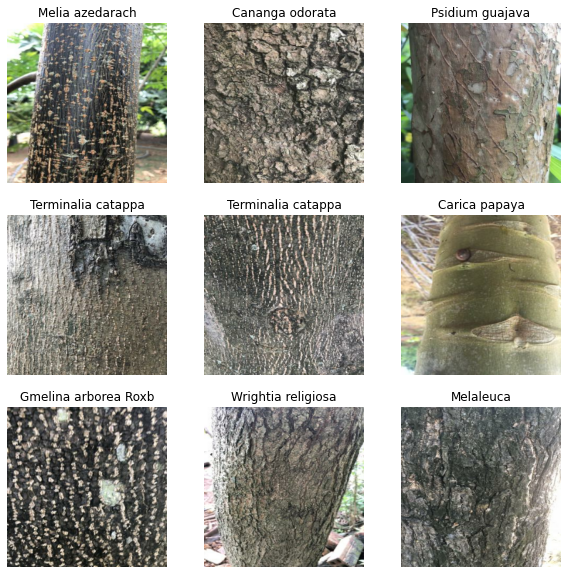

In [17]:
# We plot some Imgaes with their corresponding labes
plt.figure(figsize=(10, 10))
for images, labels in data_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(data_names[labels[i]])
    plt.axis("off")

### Data Modeling

In [19]:
# Import the images and resize them to a 220*220 size
# Also generate the corresponding labels

image_names = []
train_labels = []
train_images = []

size = 220,220

for folder in data_names:
    for file in os.listdir(os.path.join(data_dir,folder)):
        if file.endswith("JPG"):
            image_names.append(os.path.join(data_dir,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data_dir,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue

In [20]:
# Transform the image array to a numpy type

train = np.array(train_images)
train.shape

(5578, 220, 220, 3)

In [21]:
#Converting lists into numpy arrays
data = np.array(train_images)
print(data.shape)


(5578, 220, 220, 3)


In [23]:
# Extract the labels and encode

label_dummies = pd.get_dummies(train_labels)

labels =  label_dummies.values.argmax(1)

In [24]:
# shape of the labels
labels.shape

(5578,)

In [25]:
#List of the initial labels names
pd.unique(train_labels)

array(['Acacia', 'Adenanthera microsperma', 'Adenium species',
       'Anacardium occidentale', 'Annona squamosa', 'Artocarpus altilis',
       'Artocarpus heterophyllus', 'Barringtonia acutangula',
       'Cananga odorata', 'Carica papaya', 'Casuarina equisetifolia',
       'Cedrus', 'Chrysophyllum cainino', 'Citrus aurantiifolia',
       'Citrus grandis', 'Cocos nucifera', 'Dalbergia oliveri',
       'Delonix regia', 'Dipterocarpus alatus', 'Erythrina fusca',
       'Eucalyptus', 'Ficus microcarpa', 'Ficus racemosa',
       'Gmelina arborea Roxb', 'Hevea brasiliensis', 'Hopea',
       'Khaya senegalensis A.Juss', 'Khaya senegalensis',
       'Lagerstroemia speciosa', 'Magnolia alba', 'Mangifera',
       'Melaleuca', 'Melia azedarach', 'Musa', 'Nephelium lappaceum',
       'Persea', 'Polyalthia longifolia', 'Prunnus', 'Prunus salicina',
       'Psidium guajava', 'Pterocarpus macrocarpus', 'Senna siamea',
       'Spondias mombin L', 'Syzygium nervosum', 'Tamarindus indica',
       'Tec

In [26]:
# List of the labels names encoded
pd.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 26, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 48])

In [ ]:

#Splitting training and testing dataset, 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 50)
y_test = to_categorical(y_test, 50)

(4462, 220, 220, 3) (1116, 220, 220, 3) (4462,) (1116,)


We will use CNN( Convolutionnal Neural Network as our approach)

In [ ]:
#Building the model, we use 4 convolutional layers, 2 max pooling, and 3 drop out
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(50, activation='softmax'))

In [ ]:
#Compilation of the model, we use the categorical_crossentropy loss function and the adam optimizer with the metric Area under the curve
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

epochs = 10 # we use 10 epochs
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("/content/drive/MyDrive/Bark Texture Classification/Bark Data/my_model1.h5") # We save the model for a future use

Epoch 1/10
140/140 [==============================] - 1198s 9s/step - loss: 23.8846 - auc: 0.5484 - val_loss: 3.7792 - val_auc: 0.6319
Epoch 2/10
140/140 [==============================] - 1201s 9s/step - loss: 3.6270 - auc: 0.6910 - val_loss: 3.3657 - val_auc: 0.7851
Epoch 3/10
140/140 [==============================] - 1223s 9s/step - loss: 3.3186 - auc: 0.7808 - val_loss: 3.2803 - val_auc: 0.7783
Epoch 4/10
140/140 [==============================] - 1222s 9s/step - loss: 3.0273 - auc: 0.8349 - val_loss: 3.0336 - val_auc: 0.8337
Epoch 5/10
140/140 [==============================] - 1256s 9s/step - loss: 2.6750 - auc: 0.8832 - val_loss: 2.8894 - val_auc: 0.8518
Epoch 6/10
140/140 [==============================] - 1251s 9s/step - loss: 2.2501 - auc: 0.9231 - val_loss: 2.8317 - val_auc: 0.8529
Epoch 7/10
140/140 [==============================] - 1251s 9s/step - loss: 1.9383 - auc: 0.9427 - val_loss: 2.7822 - val_auc: 0.8597
Epoch 8/10
140/140 [==============================] - 1232s 9

###Loading of the model

In [4]:
model_load = keras.models.load_model("/content/drive/MyDrive/Bark Texture Classification/Bark Data/my_model1.h5")

In [27]:
# Summary of the model
model_load.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 216, 216, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 212, 212, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 106, 106, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 106, 106, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 104, 104, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 102, 102, 64)      36928     
                                                      

In [43]:
# We create a dictionnary to associate to each label encoded the initial labels
zip_iterator = zip(labels, train_labels)
dict_classes = dict(zip_iterator)
dict_classes

{0: 'Acacia',
 1: 'Adenanthera microsperma',
 2: 'Adenium species',
 3: 'Anacardium occidentale',
 4: 'Annona squamosa',
 5: 'Artocarpus altilis',
 6: 'Artocarpus heterophyllus',
 7: 'Barringtonia acutangula',
 8: 'Cananga odorata',
 9: 'Carica papaya',
 10: 'Casuarina equisetifolia',
 11: 'Cedrus',
 12: 'Chrysophyllum cainino',
 13: 'Citrus aurantiifolia',
 14: 'Citrus grandis',
 15: 'Cocos nucifera',
 16: 'Dalbergia oliveri',
 17: 'Delonix regia',
 18: 'Dipterocarpus alatus',
 19: 'Erythrina fusca',
 20: 'Eucalyptus',
 21: 'Ficus microcarpa',
 22: 'Ficus racemosa',
 23: 'Gmelina arborea Roxb',
 24: 'Hevea brasiliensis',
 25: 'Hopea',
 27: 'Khaya senegalensis A.Juss',
 26: 'Khaya senegalensis',
 28: 'Lagerstroemia speciosa',
 29: 'Magnolia alba',
 30: 'Mangifera',
 31: 'Melaleuca',
 32: 'Melia azedarach',
 33: 'Musa',
 34: 'Nephelium lappaceum',
 35: 'Persea',
 36: 'Polyalthia longifolia',
 37: 'Prunnus',
 38: 'Prunus salicina',
 39: 'Psidium guajava',
 40: 'Pterocarpus macrocarpus',


### Data Prediction

In [ ]:
nd 

In [49]:
# We create a function predict that will take as input the path of the image and predict the class of the images 
# and the probability
def predict(path_image):
  img = tf.keras.preprocessing.image.load_img(path_image, target_size=(220, 220))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  print(img_array.shape)
  img_array = tf.expand_dims(img_array, 0)
  print(img_array.shape)
  predictions = model_load.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  pred_name = dict_classes[int(np.argmax(score))]
  plt.imshow(img)
  print( "The predicted Image is: "+ pred_name, "with the probability: ", max(predictions[0]) )


First test: we take an image in the class of "Adenanthera microsperma" and we call our function predict

(220, 220, 3)
(1, 220, 220, 3)
The predicted Image is: Adenanthera microsperma with the probability:  0.8375623


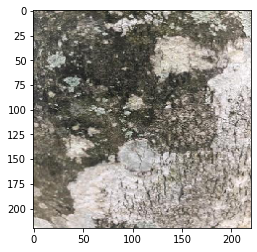

In [51]:
path_image = "/content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Adenanthera microsperma/IMG_5777.JPG"
predict(path_image)

*Interpretation:* The model has predicted that the input image belongs to the class Adenanthera microsperma with the probability 0.84 and this is true, so we have a good prediction

Second test: we take an image in the class of "Anacardium occidentale" and we call our function predict

(220, 220, 3)
(1, 220, 220, 3)
The predicted Image is: Persea with the probability:  0.34166178


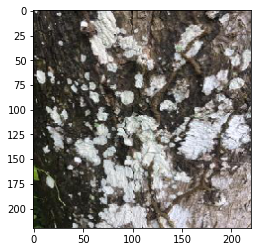

In [52]:
path_image = "/content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Anacardium occidentale/IMG_4783.JPG"
predict(path_image)

*Interpretation:* The model has predicted that the input image belongs to the class Persea with the probability 0.34 and this is false, so we have a wrong prediction

Third test: we take an image in the class of "Artocarpus altilis" and we call our function predict

(220, 220, 3)
(1, 220, 220, 3)
The predicted Image is: Artocarpus altilis with the probability:  0.9540687


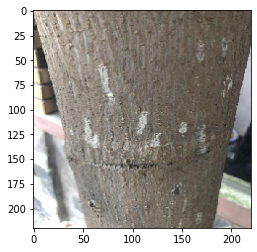

In [53]:
path_image = "/content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Artocarpus altilis/IMG_3231.JPG"
predict(path_image)

*Interpretation:* The model has predicted that the input image belongs to the class "Artocarpus altilis" with the probability 0.95 and this is false, so we have a good prediction

Fourth test: we take an image in the class of "Barringtonia acutangula" and we call our function predict

(220, 220, 3)
(1, 220, 220, 3)
The predicted Image is: Barringtonia acutangula with the probability:  0.67710847


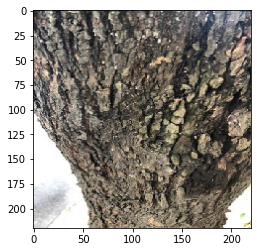

In [50]:
path_image = "/content/drive/MyDrive/Bark Texture Classification/Bark Data/BarkVN-50/BarkVN-50_mendeley/Barringtonia acutangula/IMG_3124.JPG"
predict(path_image)

*Interpretation:* The model has predicted that the input image belongs to the class "Barringtonia acutangula" with the probability 0.68 and this is false, so we have a good prediction